# Mapeos no lineales

Los clasificadores discriminantes que hemos visto hasta ahora, sólo funcionan cuando las clases son linealmente separables. ¿Cómo podemos realizar aprendizaje cuando no basta con una frontera de decisión lineal?

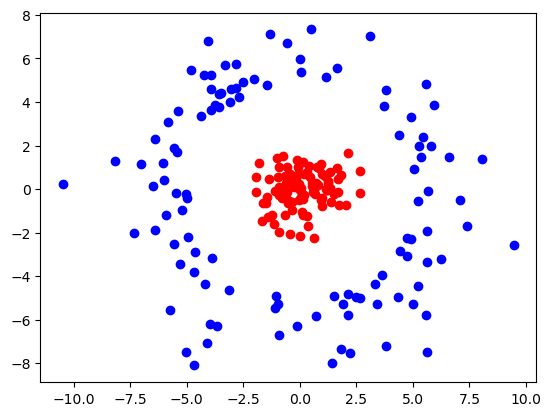

In [1]:
import matplotlib.pyplot as plt
import numpy as np
Xred=np.random.normal(size=[100,2])
Xblue=np.random.normal(size=[500,2],scale=3)
borrar=np.where(np.sqrt(Xblue[:,0]**2+Xblue[:,1]**2)<5)
Xblue=np.delete(Xblue,borrar,axis=0)
plt.scatter(Xred[:, 0], Xred[:, 1],c='red')
plt.scatter(Xblue[:, 0], Xblue[:, 1],c='blue')
plt.show()

Una posibilidad consiste en usar un **mapeo** a un espacio de mayor dimensión:

\begin{equation}
\phi: \rm I\!R^n \mapsto \rm I\!R^m
\end{equation}

donde $m > n$. Para el ejemplo de los datos que tenemos en la figura anterior, basta con usar un mapeo cuadrático. Supongamos que cada punto tiene coordenadas $x_1, x_2$, entonces un mapero usando todos los posibles monomios de estos dos elementos será:

\begin{equation}
\phi(\boldsymbol{x}) = \phi([x_1, x_2])= [ x_1^2 , x_2^2, x_1x_2]
\end{equation}

de manera que hemos hecho un mapeo desde un espacio bidimiensional a uno tridimensional $\phi: \rm I\!R^2 \mapsto \rm I\!R^3$. En este nuevo espacio de características, cada muestra tiene tres dimensiones y puede verse así:


<IPython.core.display.Javascript object>


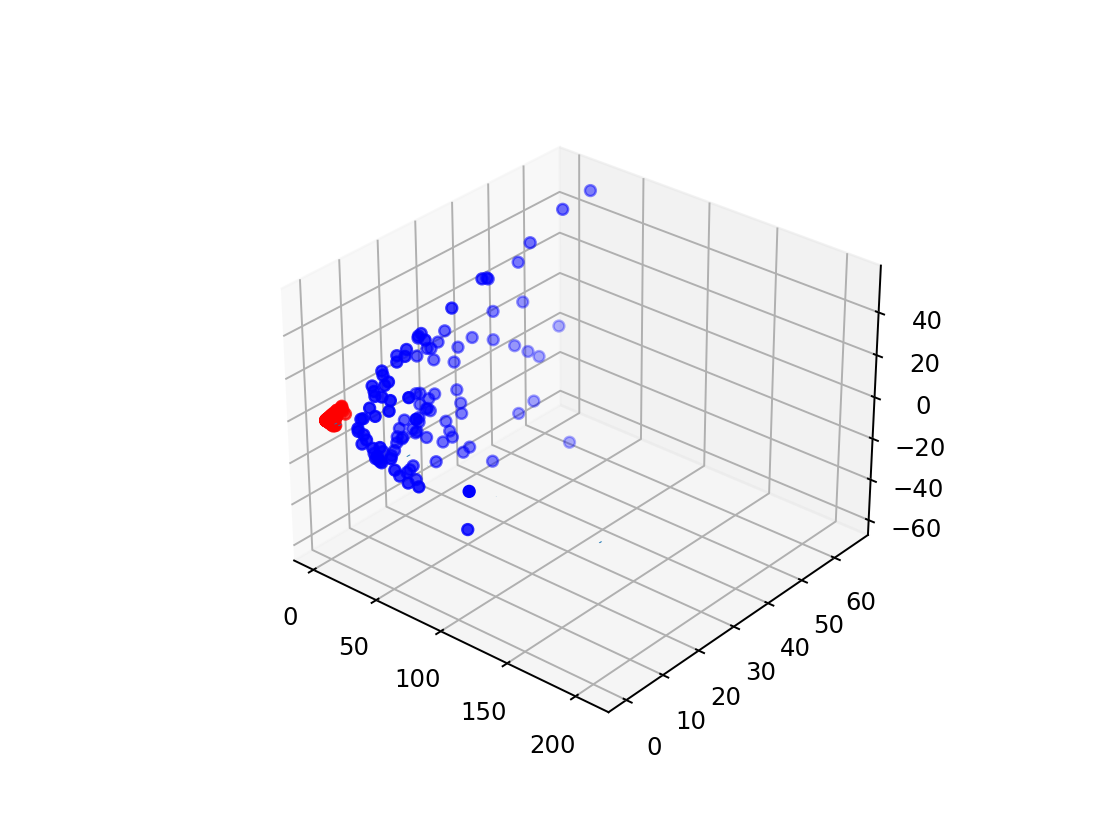

In [3]:
from mpl_toolkits.mplot3d import Axes3D
X=np.vstack((Xred,Xblue))
phiX = np.hstack((X[:,[0]]**2, X[:,[1]]**2, np.sqrt(2)*X[:,[0]]*X[:,[1]]))
#Correr fuera del notebook
%matplotlib notebook
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(phiX[:, 0], phiX[:, 1], phiX[:,2], c=np.append(np.repeat('red',len(Xred)),np.repeat('blue',len(Xblue))))
fig.show()

Podemos entrenar entonces un clasificador lineal sobre estos nuevos datos, por ejemplo el clasificador geométrico por mínimos cuadrados:

In [ ]:
y=np.append(np.repeat(1,len(Xred)),np.repeat(-1,len(Xblue)))
Xm=np.hstack((phiX,np.ones((len(phiX),1)))) #Agregamos unos en la última columna de X
XTX = np.transpose(Xm).dot(Xm)
XTXi = np.linalg.inv(XTX)
wm=((XTXi).dot(np.transpose(Xm))).dot(y)
print(wm)

Ahora veamos cómo se ve la frontera de decisión. Recordemos que la clase de una nueva muestra se asigna mediante la siguiente función discriminante:

\begin{equation}
\boldsymbol{w}\boldsymbol{x}^T = \left\{ \begin{array}{l}
>0, virginica\\
<0, setosa
\end{array}\right.
\end{equation}

In [ ]:
#Coordenadas de todos los puntos en el espacio de características
x1, x2, x3 = np.meshgrid(np.linspace(min(phiX[:,0]),max(phiX[:,0]),10),np.linspace(min(phiX[:,1]),max(phiX[:,1]),10),np.linspace(min(phiX[:,2]),max(phiX[:,2]),10))
decision = np.zeros(shape=(len(x1),len(x2),len(x3))) #Matriz para guardar las decisiones
for i in range(len(x1)):
    for j in range(len(x2)):
        for k in range(len(x3)):
            x=np.array([x1[i,j,k],x2[i,j,k],x3[i,j,k],1]) #Recordar que es necesario agregar un 1 al final para el término independiente
            decision[i,j,k] = np.sign(wm.dot(x))
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x1, x2, x3,c=decision)
fig.show()


# Métodos kernel

Sin embargo, el clasificador ha quedado diseñado para funcionar en el espacio tridimensional en lugar del espacio bidimensional original. Esta situación empeora si tenemos un problema más complejo, en el que debamos buscar un espacio con muchas más dimensiones para que los datos se vuelvan linealmente separables, lo cual aumentaría considerablemente la complejidad computacional. 

Una de las soluciones más eficientes que existen, es la de aplicar el llamado *truco del kernel*. Consideremos por ejemplo el mapeo que aplicamos en el ejemplo anterior. Si tenemos dos muestras $\boldsymbol{a} = [a_1, a_2]$ y $\boldsymbol{b} = [b_1, b_2]$, y calculamos el producto punto entre ellas, tendremos:

\begin{equation}
\boldsymbol{a}^T \boldsymbol{b} = [a_1\; a_2] \left[\begin{array}{c}
b_1\\
b_2\\
\end{array}
\right] = a_1 b_1 + a_2 b_2
\end{equation}

Por otro lado, si calculamos el procuto punto entre sus correspondientes mapeos, tendremos:

\begin{equation}
\phi(\boldsymbol{a})^T \phi(\boldsymbol{b}) = [a_1^2\;\; a_2^2\;\; a_1a_2] \left[\begin{array}{c}
b_1^2\\
b_2^2\\
b_1b_2\\
\end{array}
\right] = a_1^2 b_1^2 + a_2^2 b_2^2 + a_1 a_2 b_1 b_2
\end{equation}

Podemos darnos cuenta de que la segunda expresión es casi el cuadrado de la primera. Podemos hacer un leve cambio en el mapeo, introduciendo la constante $\sqrt{2}$ en el tercer término y tendremos:

\begin{equation}
\phi(\boldsymbol{a})^T \phi(\boldsymbol{b}) = [a_1^2\;\; a_2^2\;\; \sqrt{2}a_1a_2] \left[\begin{array}{c}
b_1^2\\
b_2^2\\
\sqrt{2}b_1b_2\\
\end{array}
\right] = a_1^2 b_1^2 + a_2^2 b_2^2 + 2a_1 a_2 b_1 b_2
\end{equation}

De modo que:
\begin{equation}
\phi(\boldsymbol{a})^T \phi(\boldsymbol{b}) = \left(\boldsymbol{a}^T \boldsymbol{b}\right)^2
\end{equation}

Y bautizaremos a esta expresión con el nombre de **kernel**:
\begin{equation}
k(\boldsymbol{a}, \boldsymbol{b})= \left(\boldsymbol{a}^T \boldsymbol{b}\right)^2
\end{equation}

El kernel es entonces **una función que sirve para calcular el producto punto de dos vectores en un espacio de dimensión superior, sin necesidad de calcular explícitamente dicho mapeo**. Uno de los clasificadores que puede explotar este truco con mayor facilidad son las SVM, puesto que su forma de entrenamiento está basada en productos punto entre las muestras. Recordemos:

\begin{equation}\label{dual}
\begin{array}{ll}
minimize & \sum_{i=1}^N \lambda_i - \frac{1}{2}\sum_{i,j}^N \lambda_i \lambda_j y_i y_j \boldsymbol{x}_i^T \boldsymbol{x}_j\\
s.t. & \sum_{i=1}^N y_i \lambda_i =0\\
& \lambda_i \geq 0\\
\end{array}
\end{equation}

Así que, reemplazando dicho producto punto por cualquier kernel, lo que estaremos haciendo es abreviando el procedimiento de mapear los datos, entrenar la SVM en el espacio mapeado y luego regresar al espacio original:

\begin{equation}
\begin{array}{ll}
minimize & \sum_{i=1}^N \lambda_i - \frac{1}{2}\sum_{i,j}^N \lambda_i \lambda_j y_i y_j k(\boldsymbol{x}_i, \boldsymbol{x}_j)\\
s.t. & \sum_{i=1}^N y_i \lambda_i =0\\
& \lambda_i \geq 0\\
\end{array}
\end{equation}

Veamos lo que pasa al usar el kernel cuadrático:

<IPython.core.display.Javascript object>


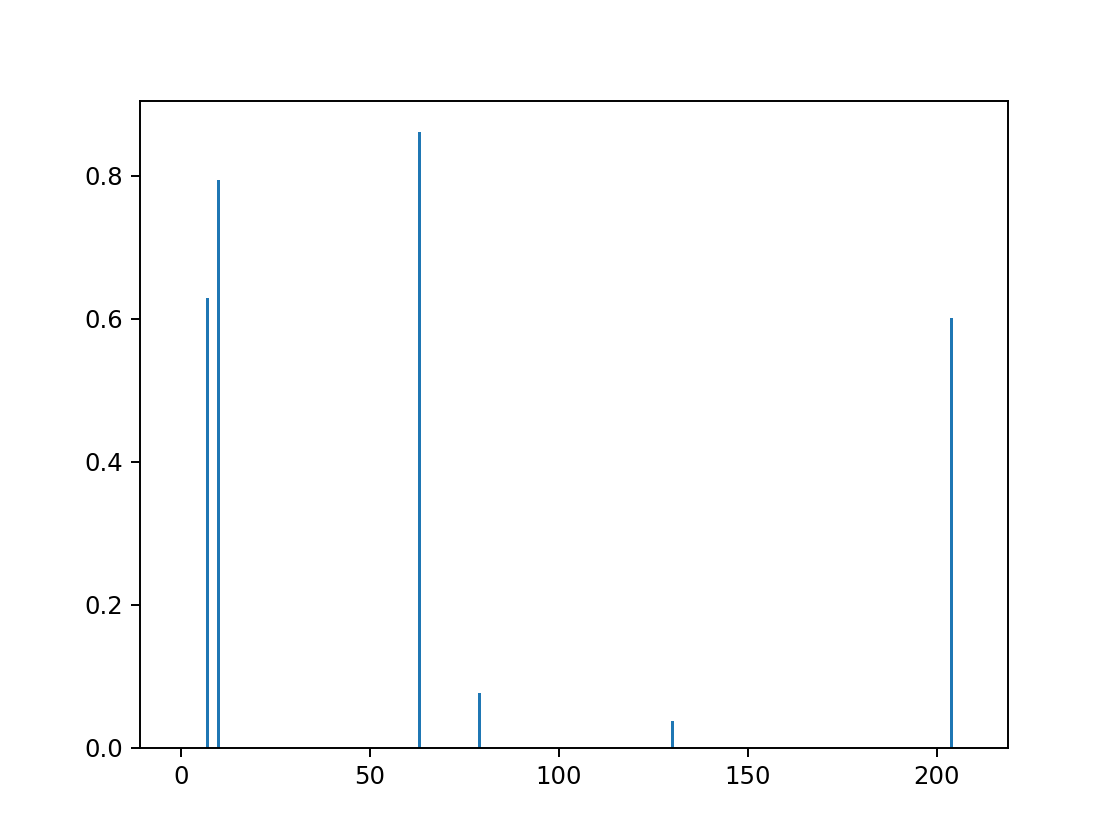

<BarContainer object of 209 artists>

In [5]:
from numpy import linalg as la
import qpsolvers

def nearestPD(A):
    B = (A + A.T) / 2
    _, s, V = la.svd(B)
    H = np.dot(V.T, np.dot(np.diag(s), V))
    A2 = (B + H) / 2
    A3 = (A2 + A2.T) / 2
    if isPD(A3):
        return A3
    spacing = np.spacing(la.norm(A))
    I = np.eye(A.shape[0])
    k = 1
    while not isPD(A3):
        mineig = np.min(np.real(la.eigvals(A3)))
        A3 += I * (-mineig * k**2 + spacing)
        k += 1
    return A3

def isPD(B):
    try:
        _ = la.cholesky(B)
        return True
    except la.LinAlgError:
        return False

y=np.append(np.repeat(1,len(Xred)),np.repeat(-1,len(Xblue)))
Xm=np.hstack((X,np.ones((len(X),1)))) 
K=(Xm.dot(np.transpose(Xm)))**2 #El único cambio respecto a la clase pasada es éste cuadrado!!!!!!
P=np.transpose(np.transpose(K*y)*y); 
q=-np.ones(len(Xm)); 
lambdas=qpsolvers.solve_qp(P=nearestPD(P), q=q,lb=np.zeros(len(Xm)),solver="proxqp")
#print(lambdas)
plt.bar(range(len(lambdas)),abs(lambdas))

Finalmente, las predicciones sobre una nueva muestra $\boldsymbol{x}_{nueva}$ se hacen usando el mismo kernel:
\begin{equation}
d = \sum_{i=1}^N \lambda_i y_i k(\boldsymbol{x}_i,\boldsymbol{x}_{nueva})
\end{equation}


[[-1. -1. -1. ... -1. -1. -1.]
 [-1. -1. -1. ... -1. -1. -1.]
 [-1. -1. -1. ... -1. -1. -1.]
 ...
 [-1. -1. -1. ... -1. -1. -1.]
 [-1. -1. -1. ... -1. -1. -1.]
 [-1. -1. -1. ... -1. -1. -1.]]


<IPython.core.display.Javascript object>


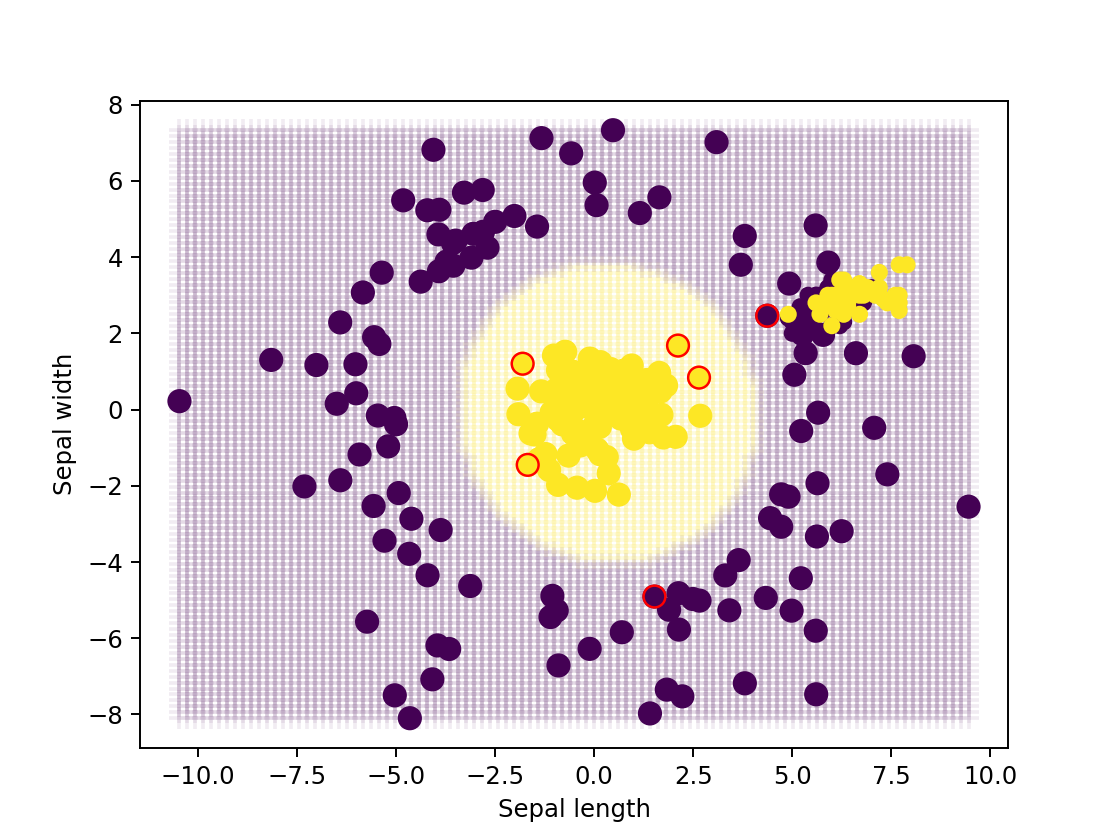

In [8]:
x1, x2 = np.meshgrid(np.linspace(min(X[:,0]),max(X[:,0]),100),np.linspace(min(X[:,1]),max(X[:,1]),100))
decision = np.zeros(shape=(len(x1),len(x2))) #Matriz para guardar las decisiones
for i in range(len(x1)):
    for j in range(len(x2)):
        x=np.array([x1[i,j],x2[i,j],1]) #Recordar que es necesario agregar un 1 al final para el término independiente
        decision[i,j] = np.sign(sum(lambdas*y*((Xm.dot(np.transpose(x)))**2)))

print(decision)
plt.scatter(X[:, 0], X[:, 1],s=80,c=y,marker='o')
plt.scatter(x1,x2,c=decision,s=80,marker='+',alpha=0.075)
vs=np.where(lambdas>0.01)
plt.scatter(X[vs,0],X[vs,1],s=80,facecolors='none',edgecolors='red')
plt.show()

Ahora, este mapeo funciona muy bien para el ejemplo de la figura. Pero ¿qué pasa cuando no sabemos cuál kernel funcionará correctamente?

Existen muchos kernels que se han usado extensivamente con las SVM (**CONSULTA**). Sin embargo, el mayormente usado es el llamado kernel función de base radial (RBF) o kernel Gaussiano:

\begin{equation}
    k(\boldsymbol{a},\boldsymbol{b}) = e^{-\frac{\|\boldsymbol{a}-\boldsymbol{b}\|^2}{2\sigma^2} }
\end{equation}

donde $\sigma$ es la dispersión del kernel y es un parámetro de usuario. Para demostrar la eficiencia de este kernel, veamos un problema completamente no lineal: 

<IPython.core.display.Javascript object>


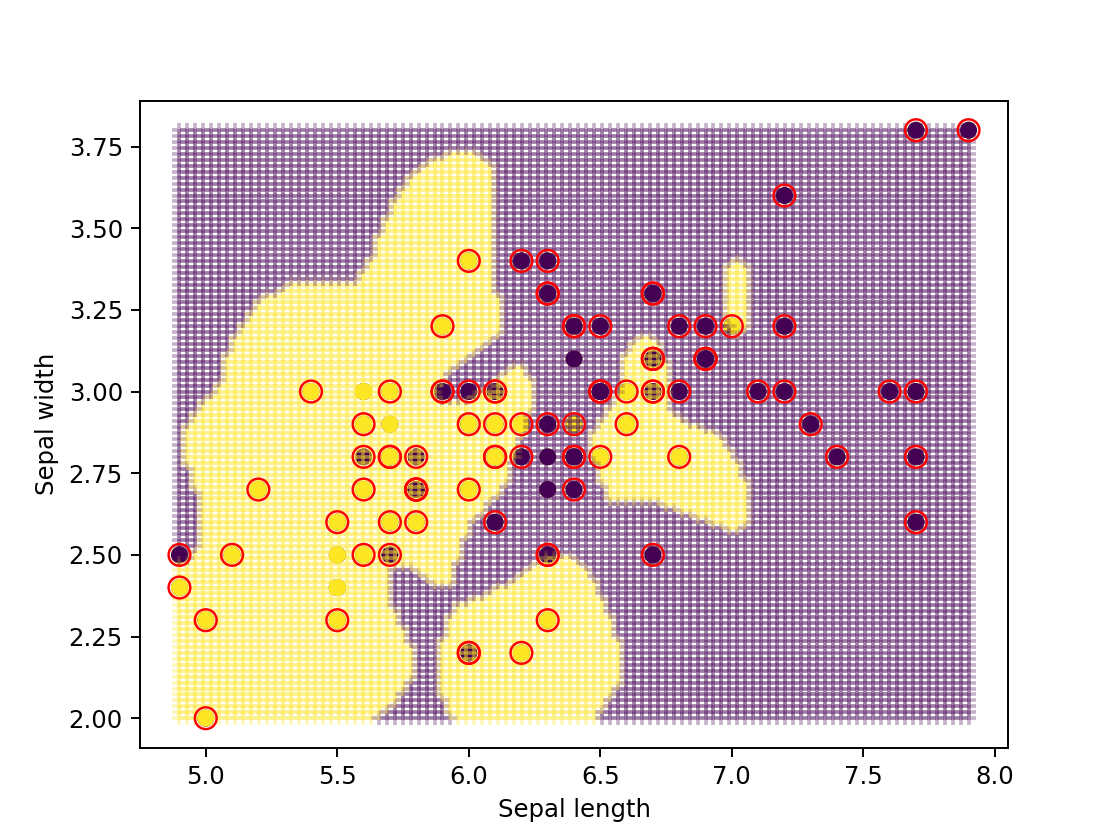

In [10]:
from sklearn import datasets
# Importamos la base de datos iris
iris = datasets.load_iris()
X = iris.data[50:150, :2]  # Esta vez tomamos las clases versicolor y virginica que son linealmente no separables
y = iris.target[50:150]
plt.scatter(X[:, 0], X[:, 1],c=y)
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')
plt.show()

<IPython.core.display.Javascript object>


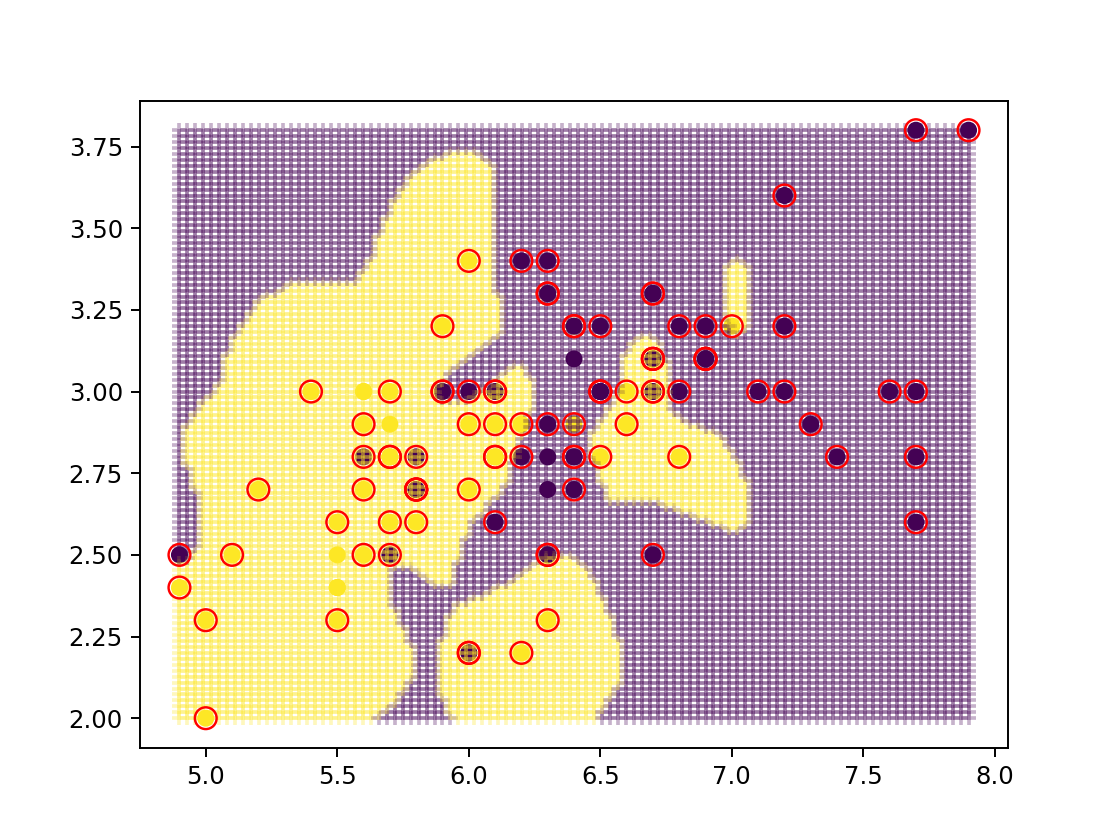

In [14]:
#Primero vamos a definir una función que calcule todas las distancias entre las filas de dos matrices
#Basada en la función dist2 de matlab hecha por Ian T. Nabney

def dist_matr(X,Y):
    nx=len(X)
    ny=len(Y)
    X2=np.repeat(np.sum(X**2,axis=1),ny)
    X2=np.reshape(X2,(-1,ny)) #Matriz con los elementos de X^2, de tamaño nx X ny
    Y2=np.repeat(np.sum(Y**2,axis=1),nx)
    Y2=np.reshape(Y2,(nx,-1),'F') #Matriz con los elementos de Y^2, de tamaño nx X ny
    XY = X.dot(np.transpose(Y)) #Matriz con los elementos de XY, de tamaño nx X ny
    dist=X2+Y2-2*XY;
    dist[np.where(dist<0)]=0; #Para evitar errores por redondeo
    dist=np.sqrt(dist)
    return dist


# Etiquetas en {-1,+1}
y = np.append(np.repeat(1, 50), np.repeat(-1, 50))

sigma = 0.1

# Kernel y QP del dual: min 0.5 a^T P a - 1^T a
D_all = dist_matr(X, X)
K = np.exp(-(D_all**2) / (2 * sigma**2))
P = (y[:, None] * K) * (y[None, :])
q = -np.ones(X.shape[0])

# Restricciones: 0 <= a_i <= C y sum(a_i y_i) = 0
C = 1.0
lb = np.zeros(X.shape[0])
ub = C * np.ones(X.shape[0])
A = y.reshape(1, -1)
b = np.array([0.0])
lambdas = qpsolvers.solve_qp(P, q, A=A, b=b, lb=lb, ub=ub, solver="proxqp")
#print(lambdas)

#Cálculo de b con vectores soporte
sv = np.where((lambdas > 1e-6) & (lambdas < C - 1e-6))[0]
if len(sv) == 0:
    sv = np.where(lambdas > 1e-6)[0]
b0 = np.mean(y[sv] - (lambdas * y) @ K[:, sv])

# Malla para dibujar la frontera
x1, x2 = np.meshgrid(
    np.linspace(min(X[:, 0]), max(X[:, 0]), 100),
    np.linspace(min(X[:, 1]), max(X[:, 1]), 100)
)

decision = np.zeros(shape=(len(x1),len(x2))) #Matriz para guardar las decisiones
for i in range(len(x1)):
    for j in range(len(x2)):
        x = np.array([x1[i, j], x2[i, j]]).reshape(1, -1)
        D = dist_matr(X, x)
        kxz = np.exp(-(D**2) / (2 * sigma**2)).ravel()
        f = np.dot(lambdas * y, kxz) + b0
        decision[i, j] = np.sign(f)

plt.scatter(X[:, 0], X[:, 1],c=y,marker='o')
plt.scatter(x1,x2,c=decision,marker='+',alpha=0.3)
vs=np.where(lambdas>0.1)
plt.scatter(X[vs,0],X[vs,1],s=80,facecolors='none',edgecolors='red')
plt.show()
